In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv('C:/Python33/NEW DATA/wineQualityReds.csv')

In [3]:
data1.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(data1.shape)

(1599, 13)


In [5]:
types = data1.dtypes
print(types)

Unnamed: 0                int64
fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [6]:
description = data1.describe()
print(description)

        Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  \
count  1599.000000    1599.000000       1599.000000  1599.000000   
mean    800.000000       8.319637          0.527821     0.270976   
std     461.735855       1.741096          0.179060     0.194801   
min       1.000000       4.600000          0.120000     0.000000   
25%     400.500000       7.100000          0.390000     0.090000   
50%     800.000000       7.900000          0.520000     0.260000   
75%    1199.500000       9.200000          0.640000     0.420000   
max    1599.000000      15.900000          1.580000     1.000000   

       residual.sugar    chlorides  free.sulfur.dioxide  total.sulfur.dioxide  \
count     1599.000000  1599.000000          1599.000000           1599.000000   
mean         2.538806     0.087467            15.874922             46.467792   
std          1.409928     0.047065            10.460157             32.895324   
min          0.900000     0.012000             1.000000        

In [7]:
class_counts = data1.groupby('quality').size()
print(class_counts)

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [8]:
correlations = data1.corr(method='pearson')
print(correlations)

                      Unnamed: 0  fixed.acidity  volatile.acidity  \
Unnamed: 0              1.000000      -0.268484         -0.008815   
fixed.acidity          -0.268484       1.000000         -0.256131   
volatile.acidity       -0.008815      -0.256131          1.000000   
citric.acid            -0.153551       0.671703         -0.552496   
residual.sugar         -0.031261       0.114777          0.001918   
chlorides              -0.119869       0.093705          0.061298   
free.sulfur.dioxide     0.090480      -0.153794         -0.010504   
total.sulfur.dioxide   -0.117850      -0.113181          0.076470   
density                -0.368372       0.668047          0.022026   
pH                      0.136005      -0.682978          0.234937   
sulphates              -0.125307       0.183006         -0.260987   
alcohol                 0.245123      -0.061668         -0.202288   
quality                 0.066453       0.124052         -0.390558   

                      citric.acid

In [9]:
skew = data1.skew()
print(skew)

Unnamed: 0              0.000000
fixed.acidity           0.982751
volatile.acidity        0.671593
citric.acid             0.318337
residual.sugar          4.540655
chlorides               5.680347
free.sulfur.dioxide     1.250567
total.sulfur.dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


In [10]:
from matplotlib import pyplot
data1.hist(figsize=(12,10))
pyplot.show()


<Figure size 1200x1000 with 16 Axes>

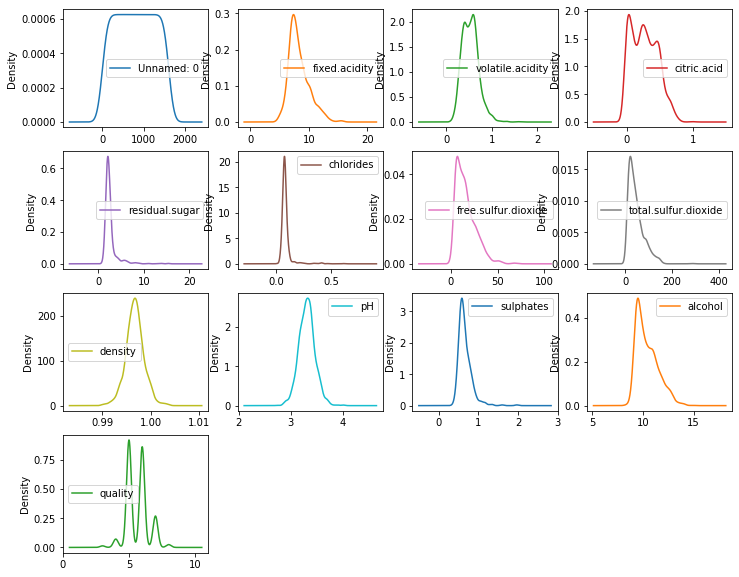

In [11]:
data1.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(12,10))
pyplot.show()

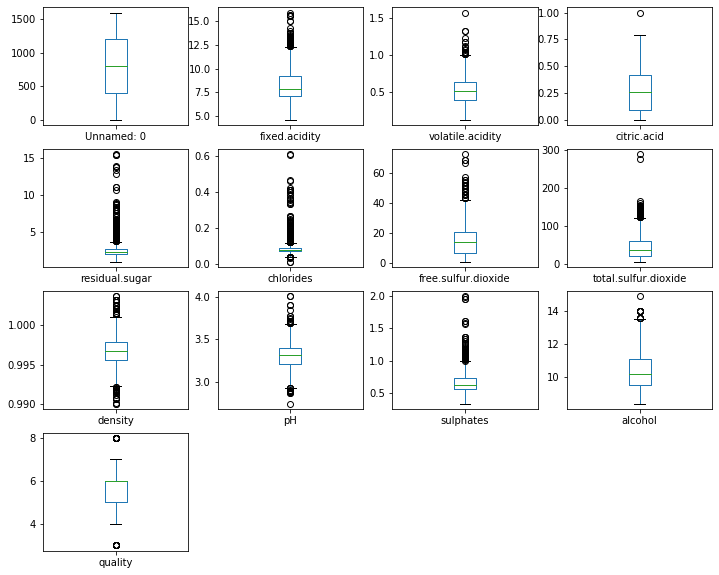

In [12]:
data1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(12,10))
pyplot.show()

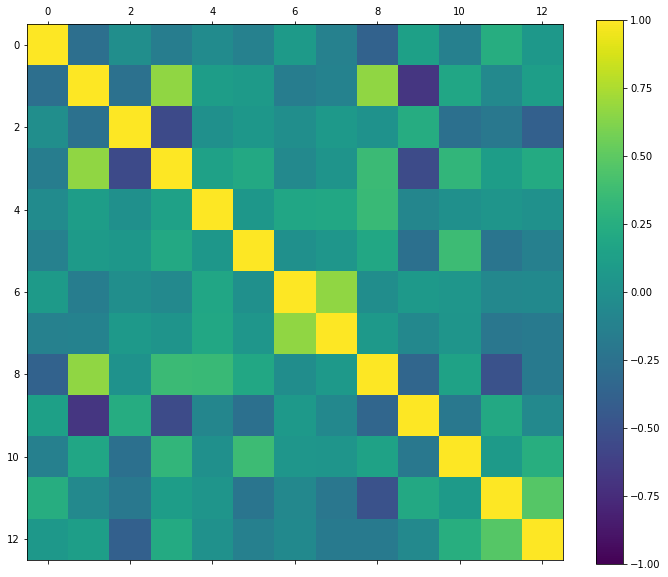

In [13]:
correlations = data1.corr()
# plot correlation matrix
fig = pyplot.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [ ]:
import pandas
from pandas.plotting import scatter_matrix

dataCorr = data1.corr()
pandas.plotting.scatter_matrix(dataCorr,figsize=(12,10))
pyplot.show

In [ ]:
X = data1.iloc[:, [1, 12]].values
y = data1.iloc[:, 12].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [72]:
import pickle 
  
saved_model = pickle.dumps(pipe_lr) 
  
from_pickle = pickle.loads(saved_model) 
  
y_pred = from_pickle.predict(X_test) 

print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.512


In [73]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(pipe_lr, 'filename.pkl') 
  
# Load the model from the file 
from_joblib = joblib.load('filename.pkl')  
  
# Use the loaded model to make predictions 
y_pred = from_joblib.predict(X_test) 

print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.512


C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
array = data1.values
# separate array into input and output components
X = array[:,1:12]
Y = array[:,12]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
print(rescaledX[0:5,:])

[[0.24778761 0.39726027 0.         0.06849315 0.10684474 0.14084507
  0.09893993 0.56754772 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         0.11643836 0.14357262 0.33802817
  0.2155477  0.49412628 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       0.09589041 0.13355593 0.1971831
  0.16961131 0.50881057 0.40944882 0.19161677 0.21538462]
 [0.5840708  0.10958904 0.56       0.06849315 0.10517529 0.22535211
  0.19081272 0.58223201 0.33070866 0.1497006  0.21538462]
 [0.24778761 0.39726027 0.         0.06849315 0.10684474 0.14084507
  0.09893993 0.56754772 0.60629921 0.13772455 0.15384615]]


In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state =0)
classifier.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
print(y_test)

[7 4 5 6 6 6 6 5 5 5 6 5 5 6 7 5 5 6 6 7 5 6 7 5 7 6 5 5 6 6 5 6 6 5 6 7 5
 5 7 6 6 5 7 5 5 5 6 5 6 7 6 5 6 6 6 5 5 5 6 5 5 6 6 6 5 5 6 5 3 6 5 5 6 6
 6 5 6 7 5 5 5 5 6 5 5 6 6 5 6 6 5 6 6 4 7 7 8 6 6 5 5 7 7 5 6 7 6 6 6 6 5
 6 6 4 5 5 5 4 5 5 5 6 5 6 5 7 7 7 5 6 8 6 5 6 5 6 6 5 6 6 5 7 5 5 6 6 7 6
 5 5 7 6 7 6 6 6 7 7 5 6 6 6 5 6 6 5 5 5 7 7 7 5 6 5 7 6 5 5 5 6 6 6 6 4 5
 8 6 6 6 5 5 7 4 5 6 5 5 6 6 5 5 5 6 4 7 5 6 6 5 7 5 5 6 5 7 6 6 5 6 5 5 7
 5 7 5 7 6 4 7 6 6 7 7 6 6 6 7 5 5 5 3 5 5 6 6 6 5 6 7 7 6 5 6 5 6 7 6 7 5
 6 5 5 5 5 5 6 6 6 6 5 5 6 6 6 5 6 7 6 5 6 6 5 7 5 5 6 5 7 5 4 5 6 6 7 5 6
 5 6 8 5 8 5 6 6 6 5 6 6 5 7 5 5 5 6 4 5 7 5 7 5]


In [21]:
print(y_pred)

[7 4 5 6 6 6 6 5 5 5 6 5 5 6 7 5 5 6 6 7 5 6 7 5 7 6 5 5 6 6 5 6 6 5 6 7 5
 5 7 6 6 5 7 5 5 5 6 5 6 7 6 5 6 6 6 5 5 5 6 5 5 6 6 6 5 5 6 5 3 6 5 5 6 6
 6 5 6 7 5 5 5 5 6 5 5 6 6 5 6 6 5 6 6 4 7 7 8 6 6 5 5 7 7 5 6 7 6 6 6 6 5
 6 6 4 5 5 5 4 5 5 5 6 5 6 5 7 7 7 5 6 8 6 5 6 5 6 6 5 6 6 5 7 5 5 6 6 7 6
 5 5 7 6 7 6 6 6 7 7 5 6 6 6 5 6 6 5 5 5 7 7 7 5 6 5 7 6 5 5 5 6 6 6 6 4 5
 7 6 6 6 5 5 7 4 5 6 5 5 6 6 5 5 5 6 4 7 5 6 6 5 7 5 5 6 5 7 6 6 5 6 5 5 7
 5 7 5 7 6 4 7 6 6 7 7 6 6 6 7 5 5 5 3 5 5 6 6 6 5 6 7 7 6 5 6 5 6 7 6 7 5
 6 5 5 5 5 5 6 6 6 6 5 5 6 6 6 5 6 7 6 5 6 6 5 7 5 5 6 5 7 5 4 5 6 6 7 5 6
 5 6 8 5 8 5 6 6 6 5 6 6 5 7 5 5 5 6 4 5 7 5 7 5]


In [22]:
from sklearn.metrics import confusion_matrix  
confusion_matrix(y_pred, y_test)

array([[  2,   0,   0,   0,   0,   0],
       [  0,  10,   0,   0,   0,   0],
       [  0,   0, 127,   0,   0,   0],
       [  0,   0,   0, 126,   0,   0],
       [  0,   0,   0,   0,  50,   1],
       [  0,   0,   0,   0,   0,   4]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))


Accuracy score: 99.687500


In [24]:
from sklearn import svm

clf = svm.SVC(kernel='linear') 

clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
print(y_test)

[7 4 5 6 6 6 6 5 5 5 6 5 5 6 7 5 5 6 6 7 5 6 7 5 7 6 5 5 6 6 5 6 6 5 6 7 5
 5 7 6 6 5 7 5 5 5 6 5 6 7 6 5 6 6 6 5 5 5 6 5 5 6 6 6 5 5 6 5 3 6 5 5 6 6
 6 5 6 7 5 5 5 5 6 5 5 6 6 5 6 6 5 6 6 4 7 7 8 6 6 5 5 7 7 5 6 7 6 6 6 6 5
 6 6 4 5 5 5 4 5 5 5 6 5 6 5 7 7 7 5 6 8 6 5 6 5 6 6 5 6 6 5 7 5 5 6 6 7 6
 5 5 7 6 7 6 6 6 7 7 5 6 6 6 5 6 6 5 5 5 7 7 7 5 6 5 7 6 5 5 5 6 6 6 6 4 5
 8 6 6 6 5 5 7 4 5 6 5 5 6 6 5 5 5 6 4 7 5 6 6 5 7 5 5 6 5 7 6 6 5 6 5 5 7
 5 7 5 7 6 4 7 6 6 7 7 6 6 6 7 5 5 5 3 5 5 6 6 6 5 6 7 7 6 5 6 5 6 7 6 7 5
 6 5 5 5 5 5 6 6 6 6 5 5 6 6 6 5 6 7 6 5 6 6 5 7 5 5 6 5 7 5 4 5 6 6 7 5 6
 5 6 8 5 8 5 6 6 6 5 6 6 5 7 5 5 5 6 4 5 7 5 7 5]


In [27]:
print(y_pred)

[7 4 5 6 6 6 6 5 5 5 6 5 5 6 7 5 5 6 6 7 5 6 7 5 7 6 5 5 6 6 5 6 6 5 6 7 5
 5 7 6 6 5 7 5 5 5 6 5 6 7 6 5 6 6 6 5 5 5 6 5 5 6 6 6 5 5 6 5 3 6 5 5 6 6
 6 5 6 7 5 5 5 5 6 5 5 6 6 5 6 6 5 6 6 4 7 7 8 6 6 5 5 7 7 5 6 7 6 6 6 6 5
 6 6 4 5 5 5 4 5 5 5 6 5 6 5 7 7 7 5 6 8 6 5 6 5 6 6 5 6 6 5 7 5 5 6 6 7 6
 5 5 7 6 7 6 6 6 7 7 5 6 6 6 5 6 6 5 5 5 7 7 7 5 6 5 7 6 5 5 5 6 6 6 6 4 5
 7 6 6 6 5 5 7 4 5 6 5 5 6 6 5 5 5 6 4 7 5 6 6 5 7 5 5 6 5 7 6 6 5 6 5 5 7
 5 7 5 7 6 4 7 6 6 7 7 6 6 6 7 5 5 5 3 5 5 6 6 6 5 6 7 7 6 5 6 5 6 7 6 7 5
 6 5 5 5 5 5 6 6 6 6 5 5 6 6 6 5 6 7 6 5 6 6 5 7 5 5 6 5 7 5 4 5 6 6 7 5 6
 5 6 8 5 8 5 6 6 6 5 6 6 5 7 5 5 5 6 4 5 7 5 7 5]


In [28]:
from sklearn.metrics import confusion_matrix  
confusion_matrix(y_pred, y_test)

array([[  2,   0,   0,   0,   0,   0],
       [  0,  10,   0,   0,   0,   0],
       [  0,   0, 127,   0,   0,   0],
       [  0,   0,   0, 126,   0,   0],
       [  0,   0,   0,   0,  50,   1],
       [  0,   0,   0,   0,   0,   4]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))


Accuracy score: 99.687500


In [30]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
print(y_test)

[7 4 5 6 6 6 6 5 5 5 6 5 5 6 7 5 5 6 6 7 5 6 7 5 7 6 5 5 6 6 5 6 6 5 6 7 5
 5 7 6 6 5 7 5 5 5 6 5 6 7 6 5 6 6 6 5 5 5 6 5 5 6 6 6 5 5 6 5 3 6 5 5 6 6
 6 5 6 7 5 5 5 5 6 5 5 6 6 5 6 6 5 6 6 4 7 7 8 6 6 5 5 7 7 5 6 7 6 6 6 6 5
 6 6 4 5 5 5 4 5 5 5 6 5 6 5 7 7 7 5 6 8 6 5 6 5 6 6 5 6 6 5 7 5 5 6 6 7 6
 5 5 7 6 7 6 6 6 7 7 5 6 6 6 5 6 6 5 5 5 7 7 7 5 6 5 7 6 5 5 5 6 6 6 6 4 5
 8 6 6 6 5 5 7 4 5 6 5 5 6 6 5 5 5 6 4 7 5 6 6 5 7 5 5 6 5 7 6 6 5 6 5 5 7
 5 7 5 7 6 4 7 6 6 7 7 6 6 6 7 5 5 5 3 5 5 6 6 6 5 6 7 7 6 5 6 5 6 7 6 7 5
 6 5 5 5 5 5 6 6 6 6 5 5 6 6 6 5 6 7 6 5 6 6 5 7 5 5 6 5 7 5 4 5 6 6 7 5 6
 5 6 8 5 8 5 6 6 6 5 6 6 5 7 5 5 5 6 4 5 7 5 7 5]


In [33]:
print(y_pred)

[7 4 5 6 6 6 6 5 5 5 6 5 5 6 7 5 5 6 6 7 5 6 7 5 7 6 5 5 6 6 5 6 6 5 6 7 5
 5 7 6 6 5 7 5 5 5 6 5 6 7 6 5 6 6 6 5 5 5 6 5 5 6 6 6 5 5 6 5 3 6 5 5 6 6
 6 5 6 7 5 5 5 5 6 5 5 6 6 5 6 6 5 6 6 4 7 7 8 6 6 5 5 7 7 5 6 7 6 6 6 6 5
 6 6 4 5 5 5 4 5 5 5 6 5 6 5 7 7 7 5 6 8 6 5 6 5 6 6 5 6 6 5 7 5 5 6 6 7 6
 5 5 7 6 7 6 6 6 7 7 5 6 6 6 5 6 6 5 5 5 7 7 7 5 6 5 7 6 5 5 5 6 6 6 6 4 5
 7 6 6 6 5 5 7 4 5 6 5 5 6 6 5 5 5 6 4 7 5 6 6 5 7 5 5 6 5 7 6 6 5 6 5 5 7
 5 7 5 7 6 4 7 6 6 7 7 6 6 6 7 5 5 5 3 5 5 6 6 6 5 6 7 7 6 5 6 5 6 7 6 7 5
 6 5 5 5 5 5 6 6 6 6 5 5 6 6 6 5 6 7 6 5 6 6 5 7 5 5 6 5 7 5 4 5 6 6 7 5 6
 5 6 8 5 8 5 6 6 6 5 6 6 5 7 5 5 5 6 4 5 7 5 7 5]


In [34]:
from sklearn.metrics import confusion_matrix  
confusion_matrix(y_pred, y_test)

array([[  2,   0,   0,   0,   0,   0],
       [  0,  10,   0,   0,   0,   0],
       [  0,   0, 127,   0,   0,   0],
       [  0,   0,   0, 126,   0,   0],
       [  0,   0,   0,   0,  50,   1],
       [  0,   0,   0,   0,   0,   4]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print(classification_report(y_test, y_pred))


Accuracy score: 99.687500
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00       127
           6       1.00      1.00      1.00       126
           7       0.98      1.00      0.99        50
           8       1.00      0.80      0.89         5

    accuracy                           1.00       320
   macro avg       1.00      0.97      0.98       320
weighted avg       1.00      1.00      1.00       320



In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7,stratify=y)

In [37]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
svm_est = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVC()))])

In [38]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]

In [39]:
param_grid = dict(svc__estimator__gamma=gammas,
svc__estimator__C=Cs)

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2,random_state=7)
rand_grid = RandomizedSearchCV(svm_est,param_distributions=param_grid, cv=cv,n_iter=10)
rand_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
                   error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVC(C=1.0,
                                                                                cache_size=200,
                                                                                class_weight=None,
                                                                                coef0=0.0,
                                                                      

In [41]:
rand_grid.best_params_

{'svc__estimator__gamma': 1, 'svc__estimator__C': 0.1}

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


  Name    Score
0  KNN  0.46875
1  SVC  0.55000
2   LR  0.58750
3   DT  0.59375
4  GNB  0.56250
5   RF  0.65625
6   GB  0.66875


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [71]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2),LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=1, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [74]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10,random_state=1).split(X_train,y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
    np.bincount(y_train[train]), score))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold:  1, Class dist.: [  0   0   0   8  40 499 459 129  13], Acc: 0.595


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold:  2, Class dist.: [  0   0   0   8  40 499 460 129  13], Acc: 0.462


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold:  3, Class dist.: [  0   0   0   8  40 499 460 129  13], Acc: 0.531


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold:  4, Class dist.: [  0   0   0   8  40 499 460 129  13], Acc: 0.500


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold:  5, Class dist.: [  0   0   0   8  40 499 460 130  13], Acc: 0.535
Fold:  6, Class dist.: [  0   0   0   8  41 500 460 130  14], Acc: 0.516


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

Fold:  7, Class dist.: [  0   0   0   8  41 500 460 130  14], Acc: 0.516
Fold:  8, Class dist.: [  0   0   0   8  41 500 460 130  14], Acc: 0.492


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Fold:  9, Class dist.: [  0   0   0   8  41 500 460 130  14], Acc: 0.460
Fold: 10, Class dist.: [  0   0   0   9  41 500 460 130  14], Acc: 0.480


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [75]:
print('\nCV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


CV accuracy: 0.509 +/- 0.038


In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.

CV accuracy scores: [0.59541985 0.46153846 0.53076923 0.5        0.53488372 0.51587302
 0.51587302 0.49206349 0.46031746 0.48      ]
CV accuracy: 0.509 +/- 0.038


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_c

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


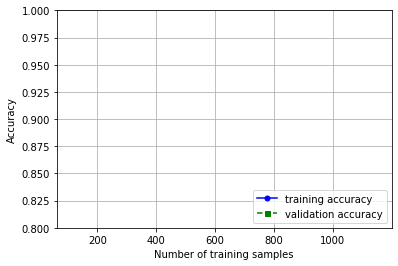

In [77]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, 
                                                          X=X_train, y=y_train, 
                                                train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_c

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


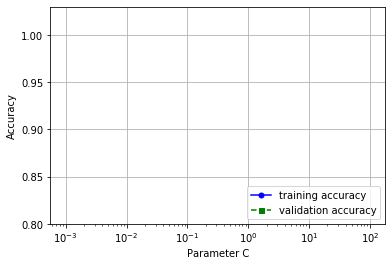

In [78]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='logisticregression__C',param_range=param_range,cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()